In [1]:
# 科学运算
import pandas as pd 
import numpy as np 
# 绘图
import matplotlib.pyplot as plt 
import seaborn as sns 
# 无视警告
import warnings 
warnings.filterwarnings('ignore')
# %matplotlib inline 

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #设置字体
# sns.set(font='SimHei') #设置中文编码
plt.rcParams['font.family'] = 'SimHei' #选择中文字体

In [2]:
train_cleaned = pd.read_csv('train_cleaned.csv')

In [3]:
import math

# 绘制每个特征的分布  参数（数据集，列，宽，高，高距，宽距）
def plot_distribution(dataset,cols=5,width=20,height=15,hspace=0.2,wspace=0.5):
    plt.style.use('seaborn-whitegrid')  # 绘制风格 白网格
    fig = plt.figure(figsize=(width,height))  # 画布大小
    # 子图调整 上下左右都是None，就是设置图形的位置，边距
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace) #为了好看
    #ceil：天花板。 取dataset的列，然后转换成float，除以我们的cols。 目的是求得我们要画多少行的图，例如求出来是3.5，我们就画4行
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #以上都是准备工作
    
    for i,column in enumerate(dataset[code_col+num_col].columns):   # 遍历特征 （索引和列名） 每一列都是特征，所以我们遍历列就是遍历特征
        ax = fig.add_subplot(rows,cols,i+1)  # 每遍历一下我们添加一个子图，我们子图占多少行多少列就已经确定了
        ax.set_title(column)  # 设置标题

        if column in code_col:  # 判断列的数据类型  object指的是非数据型特征
            g = sns.countplot(y=column,data=dataset)  #画统计数量的条形图
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column]) #绘制分布图
            plt.xticks(rotation=25)

In [4]:
code_col = ['sales_region_code','first_cate_code','second_cate_code','sales_chan_name']
num_col = ['item_price','ord_qty']

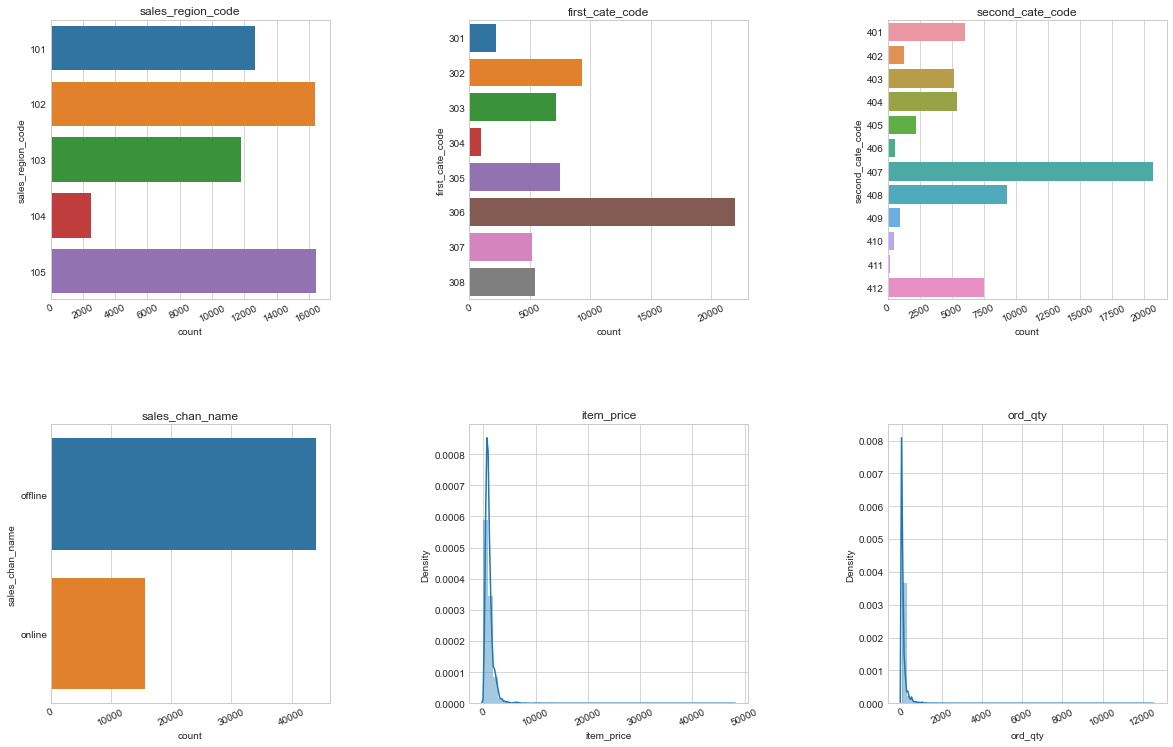

In [5]:
import warnings
warnings.filterwarnings('ignore') 
plot_distribution(train_cleaned,cols=3,width=20,height=20,hspace=0.45,wspace=0.5)

## （1） 产品的不同价格对需求量的影响；

### 1.1分区间可视化：将价格划分为不同的区间，计算每个区间的需求量，并以条形图的形式展示。

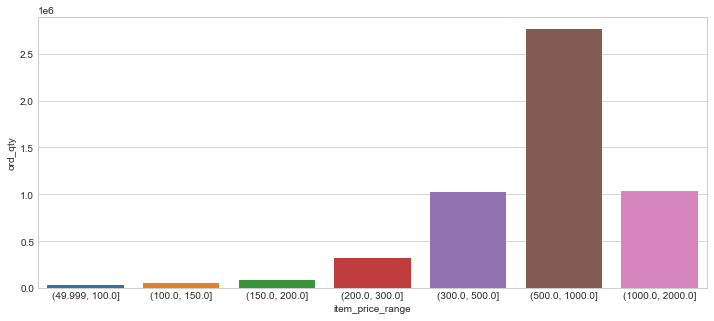

In [6]:
train_cleaned['item_price_range'] = pd.cut(train_cleaned['item_price'], bins=[50, 100, 150, 200, 300, 500, 1000, 2000], include_lowest=True)
price_range_sales = train_cleaned.groupby('item_price_range')['ord_qty'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='item_price_range', y='ord_qty', data=price_range_sales)
plt.show()

## （2） 产品所在区域对需求量的影响，以及不同区域的产品需求量有何特性；

### 2.1 计算每个区域的总需求量，并绘制条形图进行可视化，以直观地了解不同区域的需求量差异。

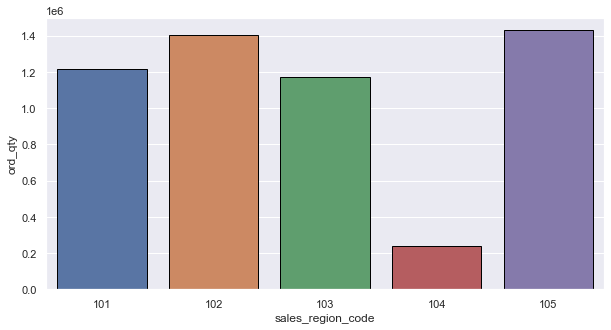

In [7]:
sns.set(rc={'patch.edgecolor': 'black', 'patch.linewidth': 1})
sales_by_region = train_cleaned.groupby('sales_region_code')['ord_qty'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='sales_region_code', y='ord_qty', data=sales_by_region)
plt.show()

### 2.2 不同区域的产品需求量的分布特征，例如需求量的均值、中位数、标准差等。我们可以使用箱线图或小提琴图对这些统计量进行可视化。

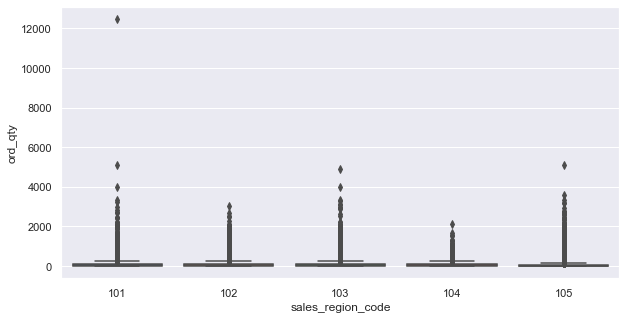

In [8]:
plt.figure(figsize=(10, 5))
sns.set_style('white')
sns.set(rc={'patch.edgecolor': 'black', 'patch.linewidth': 1})
sns.boxplot(x='sales_region_code', y='ord_qty', data=train_cleaned)
plt.show()

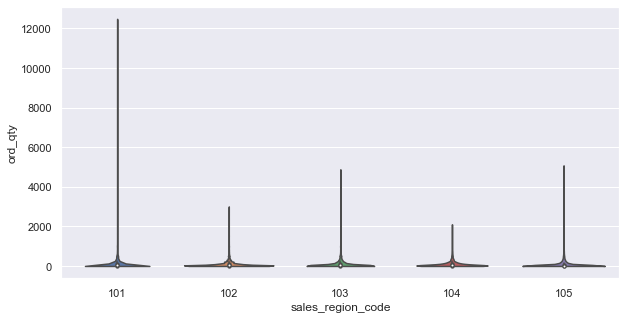

In [9]:
plt.figure(figsize=(10, 5))
sns.set_style('white')
sns.set(rc={'patch.edgecolor': 'black', 'patch.linewidth': 1})
sns.violinplot(x='sales_region_code', y='ord_qty', data=train_cleaned, cut=0)
plt.show()

### 2.3 分析不同区域的产品需求量随时间的变化趋势。首先需要将时间数据转换为合适的格式，然后计算每个区域在每个时间点的需求量，并绘制折线图。

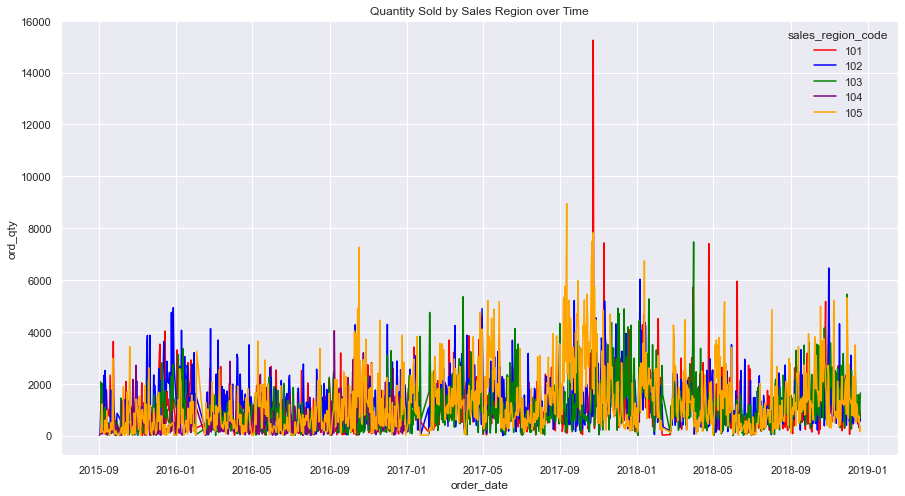

In [10]:
# 将时间数据转换为 datetime 类型
train_cleaned['order_date'] = pd.to_datetime(train_cleaned['order_date'], format='%Y-%m-%d')

# 自定义颜色
custom_palette = {
    101: "red",
    102: "blue",
    103: "green",
    104: "purple",
    105: "orange"
}

# 计算每个区域在每个时间点的需求量
quantity_by_region_and_time = train_cleaned.groupby(['sales_region_code', 'order_date'])['ord_qty'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x='order_date', y='ord_qty', hue='sales_region_code', data=quantity_by_region_and_time, palette=custom_palette)
plt.title('Quantity Sold by Sales Region over Time')
plt.show()

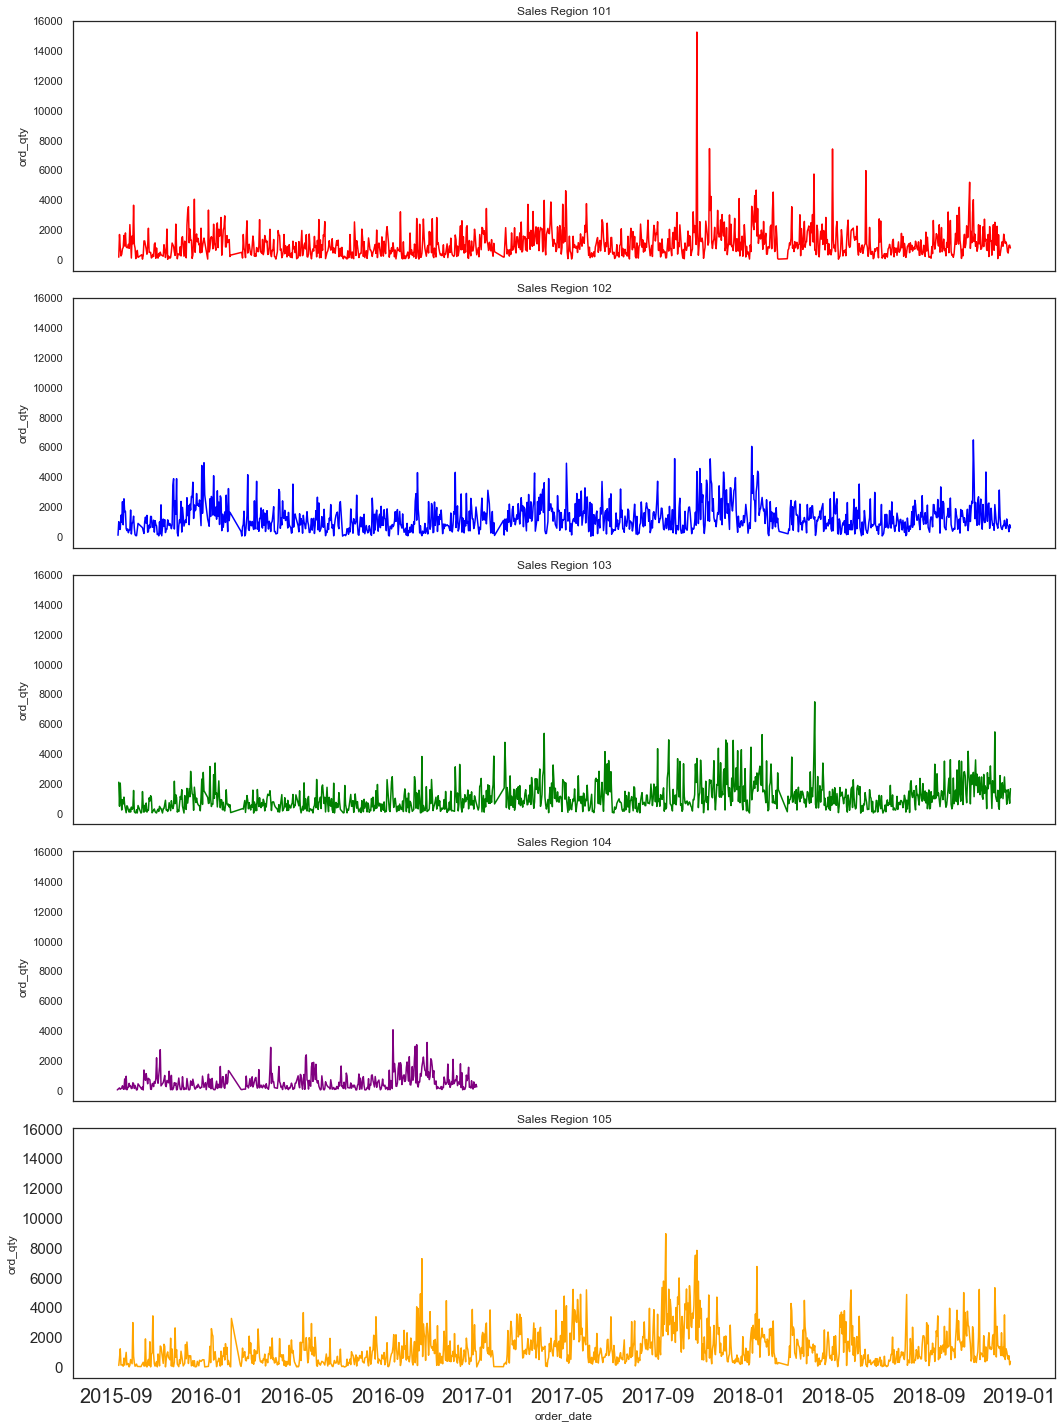

In [11]:
import matplotlib.pyplot as plt

# 将时间数据转换为 datetime 类型
train_cleaned['order_date'] = pd.to_datetime(train_cleaned['order_date'], format='%Y-%m-%d')

sns.set_style("white")
# 自定义颜色
custom_palette = {
    101: "red",
    102: "blue",
    103: "green",
    104: "purple",
    105: "orange"
}

# 计算每个区域在每个时间点的需求量
quantity_by_region_and_time = train_cleaned.groupby(['sales_region_code', 'order_date'])['ord_qty'].sum().reset_index()

# 创建子图网格
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), sharex=True, sharey=True)

# 在每个子图中绘制对应区域的数据
for i, region in enumerate(sorted(train_cleaned['sales_region_code'].unique())):
    region_data = quantity_by_region_and_time[quantity_by_region_and_time['sales_region_code'] == region]
    sns.lineplot(x='order_date', y='ord_qty', data=region_data, ax=axes[i], color=custom_palette[region])
    axes[i].set_title(f'Sales Region {region}')
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

## 作业

## （3） 不同销售方式（线上和线下）的产品需求量的特性；

### 3.1 绘制饼图和柱状图

## 2. 不同销售方式的需求量随时间的变化

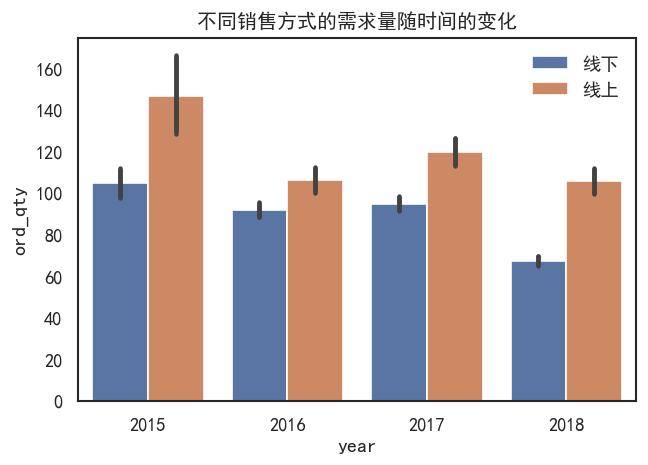

In [19]:
train_cleaned['year'] = pd.to_datetime(train_cleaned['order_date']).dt.year
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #设置字体
# sns.set(font='SimHei') #设置中文编码
plt.rcParams['font.family'] = 'SimHei' #选择中文字体
plt.figure(dpi=120)
sns.barplot(x = 'year',y='ord_qty',hue='sales_chan_name',data=train_cleaned)
plt.ylabel('需求量')
plt.title('不同销售方式的需求量随时间的变化')

# 使用新的标签替换原来的标签，并保留颜色区分
new_labels = ['线下', '线上'] 
plt.legend(handles=sns.barplot(x = 'year',y='ord_qty',hue='sales_chan_name',data=train_cleaned).get_legend_handles_labels()[0], labels=new_labels)

plt.show()

 # 3 不同销售方式在各个区域的需求量

In [12]:
demand_region= train_cleaned.groupby(['sales_chan_name', 'sales_region_code'])['ord_qty'].sum()
print(demand_region)

sales_chan_name  sales_region_code
offline          101                  1137105
                 102                  1370844
                 103                  1051783
                 104                     8795
                 105                   145972
online           101                    80977
                 102                    34742
                 103                   120912
                 104                   231850
                 105                  1282454
Name: ord_qty, dtype: int64


### 柱状图

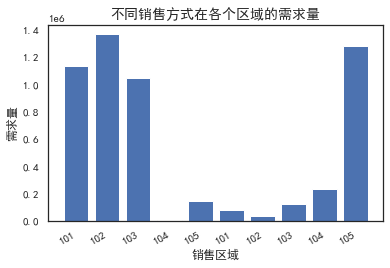

In [13]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #设置字体
# sns.set(font='SimHei') #设置中文编码
plt.rcParams['font.family'] = 'SimHei' #选择中文字体
# 按销售方式和销售区域编码进行分组
grouped_data = train_cleaned.groupby(['sales_chan_name', 'sales_region_code'])['ord_qty'].sum().reset_index()

# 提取销售方式、销售区域编码和需求量数据
sales_channels = grouped_data['sales_chan_name']
sales_regions = grouped_data['sales_region_code']
demand = grouped_data['ord_qty']


fig, ax = plt.subplots()
x = range(len(sales_regions))
ax.bar(x, demand)
ax.set_xticks(x)
ax.set_xticklabels(sales_regions)
ax.set_xlabel('销售区域')
ax.set_ylabel('需求量')
ax.set_title('不同销售方式在各个区域的需求量',fontsize=14)

fig.autofmt_xdate()
plt.show()

### 饼图

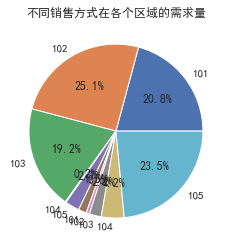

In [14]:
grouped_data = train_cleaned.groupby(['sales_chan_name', 'sales_region_code'])['ord_qty'].sum().reset_index()

sales_channels = grouped_data['sales_chan_name']
sales_regions = grouped_data['sales_region_code']
demand = grouped_data['ord_qty']

fig, ax = plt.subplots()
ax.pie(demand, labels=sales_regions, autopct='%1.1f%%')
ax.set_title('不同销售方式在各个区域的需求量')

plt.show()

# 4. 不同销售方式的价格分布

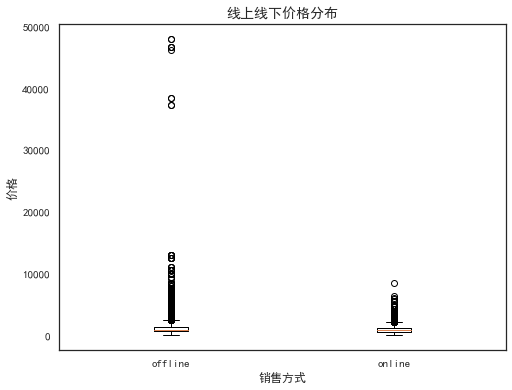

In [15]:
grouped_data = train_cleaned.groupby('sales_chan_name')['item_price'].apply(list)

fig, ax = plt.subplots(figsize=(8, 6)) 
ax.boxplot(grouped_data, labels=grouped_data.index)

ax.set_title('线上线下价格分布',fontsize=14)
ax.set_xlabel('销售方式')
ax.set_ylabel('价格')
plt.show()

## （4） 不同品类之间的产品需求量有何不同点和共同点；

### 4.1 计算每个一级品类（first_cate_code）和二级品类（second_cate_code）的总需求量，并绘制条形图进行可视化

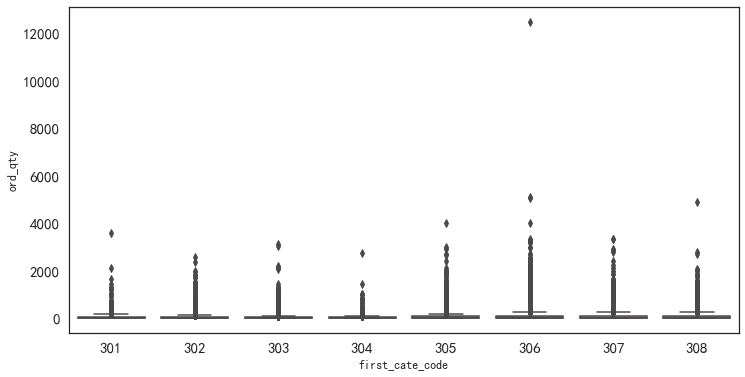

In [16]:
# 1. 不同品类的需求量分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='first_cate_code', y='ord_qty', data=train_cleaned)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 4.2 分析不同品类在不同销售区域的需求量分布。可以使用柱状图或堆叠柱状图进行可视化。

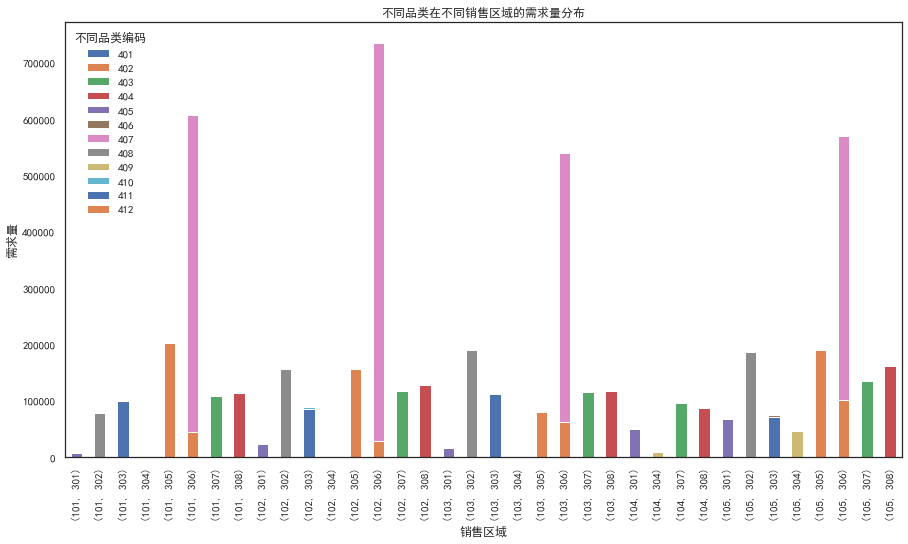

In [17]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #设置字体
# sns.set(font='SimHei') #设置中文编码
plt.rcParams['font.family'] = 'SimHei' #选择中文字体

# 按销售区域、一级品类和二级品类对需求量进行分组求和
demand_data = train_cleaned.groupby(['sales_region_code', 'first_cate_code', 'second_cate_code'])['ord_qty'].sum().unstack()

demand_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('不同品类在不同销售区域的需求量分布')
plt.xlabel('销售区域')
plt.ylabel('需求量')
plt.legend(title='不同品类编码')
plt.show()

### 4.3 分析不同品类的产品需求量随时间的变化趋势。

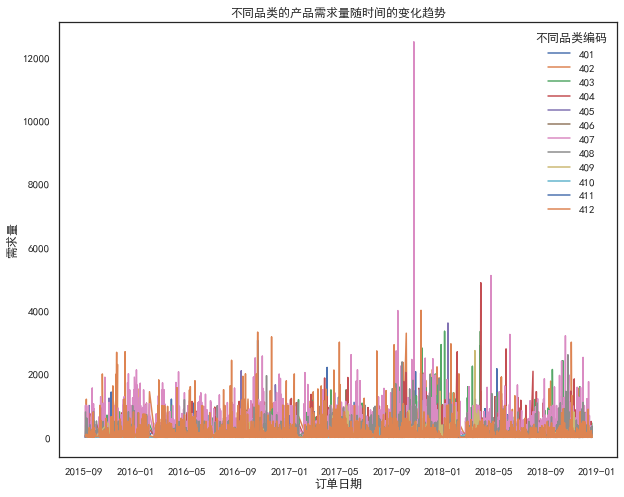

In [18]:
# 按品类对需求量进行分组求和
demand_by_category = train_cleaned.groupby('second_cate_code')['ord_qty'].sum()

plt.figure(figsize=(10, 8))
for category, demand in demand_by_category.iteritems():
    plt.plot(train_cleaned[train_cleaned['second_cate_code'] == category]['order_date'],train_cleaned[train_cleaned['second_cate_code'] == category]['ord_qty'], label=category)

plt.title('不同品类的产品需求量随时间的变化趋势')
plt.xlabel('订单日期')
plt.ylabel('需求量')

plt.legend(title='不同品类编码')

plt.show()